In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pickle

In [2]:
y_test = pd.read_csv('y_test.csv')
file = open("Selection Methods","rb")
sel_methods = np.load(file)
model_name = "decision_tree"
display_name = "Decision Tree"

In [3]:
def get_best_model(method, args, _cv, is_sample):
    sample_string = ''
    if (is_sample):
        sample_string = '_sample'
    y_train = pd.read_csv('y_train'+ sample_string + '.csv')    
    method_string = method
    if (method == ''):
        method_string = "no feature selection"
    print('\n\nRunning cross fold validation for',display_name,'with',method_string,'dataset')
    x_train = pd.read_csv('x_train' + method + sample_string + '.csv').values
    x_test = pd.read_csv('x_test' + method + '.csv').values
    pipe = Pipeline([('clf', DecisionTreeRegressor())])
    grid = GridSearchCV(pipe, args, cv = _cv, verbose = 1, scoring = 'r2', n_jobs=6)
    grid.fit(x_train, y_train.values.ravel())
    print('\nBest score for',display_name,'with',method_string,"dataset:",grid.best_score_)
    best_args = grid.best_estimator_.get_params()
    print('\nBest hyperparameters for',display_name,'with',method_string,'dataset:')
    for arg in best_args:
        print(arg,":",best_args[arg])
    y_test_predict = grid.predict(x_test)
    mse = mean_squared_error(y_test,y_test_predict)
    mae = mean_absolute_error(y_test,y_test_predict)
    r2 = r2_score(y_test,y_test_predict)
    print('\nPrediction scores for',display_name,'using',method_string,':')
    print('Mean Squared error:',mse)
    print('Mean Absolute error:',mae)
    print('R^2:',r2)
    return grid.best_estimator_,grid.best_score_,mse,mae,r2

In [5]:
def save_model(model,method):
    with open('CrimeGUI/Models/'+model_name+method,'wb') as file:
        pickle.dump(model,file)

In [6]:
print(sel_methods)

['_f_regression' '_chi2' '_adaboost' '_equal_crime_and_business'
 '_all_business']


<h3>F-Regression feature selected dataset<h3>

In [10]:
is_sample = True
num_folds = 5
args = {'clf__criterion':('mse','friedman_mse','mae','poisson'),
         'clf__splitter':('best','random'),
         'clf__min_samples_split':(2,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100),
         'clf__min_samples_leaf':(1,2,3,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100),
         'clf__max_features':('sqrt','log2'),
         'clf__random_state':([7]),
         'clf__min_impurity_decrease':(0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0)}

In [11]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Decision Tree with _f_regression dataset
Fitting 5 folds for each of 85008 candidates, totalling 425040 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  40 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 2060 tasks      | elapsed:    4.3s
[Parallel(n_jobs=6)]: Done 9228 tasks      | elapsed:   10.3s
[Parallel(n_jobs=6)]: Done 20428 tasks      | elapsed:   18.6s
[Parallel(n_jobs=6)]: Done 34828 tasks      | elapsed:   29.0s
[Parallel(n_jobs=6)]: Done 52428 tasks      | elapsed:   41.0s
[Parallel(n_jobs=6)]: Done 73228 tasks      | elapsed:   59.0s
[Parallel(n_jobs=6)]: Done 97228 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 124428 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 154828 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 188428 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 213336 tasks      | elapsed:  5.1min
[Parallel(n_jobs=6)]: Done 214586 tasks      | elapsed:  7.2min
[Parallel(n_jobs=6)]: Done 215936 tasks      | elapsed:  9.2min
[Parallel(n_jobs=6)]: Done 217386 tasks  


Best score for Decision Tree with _f_regression dataset: 0.7167231707611397

Best hyperparameters for Decision Tree with _f_regression dataset:
memory : None
steps : [('clf', DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.7, min_samples_leaf=15,
                      min_samples_split=35, random_state=7))]
verbose : False
clf : DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.7, min_samples_leaf=15,
                      min_samples_split=35, random_state=7)
clf__ccp_alpha : 0.0
clf__criterion : friedman_mse
clf__max_depth : None
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__min_impurity_decrease : 0.7
clf__min_impurity_split : None
clf__min_samples_leaf : 15
clf__min_samples_split : 35
clf__min_weight_fraction_leaf : 0.0
clf__presort : deprecated
clf__random_state : 7
clf__splitter : best

Prediction scores for Decision Tree using _f_regress

In [7]:
# fine tuning of all numeric hyperparameters, all others kept at full range
is_sample = True
num_folds = 5
args = {'clf__criterion':('mse','friedman_mse','mae','poisson'),
         'clf__splitter':('best','random'),
         'clf__min_samples_split':(30,31,32,33,34,35,36,37,38,39,40),
         'clf__min_samples_leaf':(10,11,12,13,14,15,16,17,18,19,20),
         'clf__max_features':('sqrt','log2'),
         'clf__random_state':([7]),
         'clf__min_impurity_decrease':(0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9)}

In [8]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Decision Tree with _f_regression dataset
Fitting 5 folds for each of 17424 candidates, totalling 87120 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  40 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 3724 tasks      | elapsed:    4.4s
[Parallel(n_jobs=6)]: Done 11724 tasks      | elapsed:   10.2s
[Parallel(n_jobs=6)]: Done 22924 tasks      | elapsed:   19.7s
[Parallel(n_jobs=6)]: Done 37324 tasks      | elapsed:   38.9s
[Parallel(n_jobs=6)]: Done 44358 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 45008 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 45758 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 46608 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 47558 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 48608 tasks      | elapsed:  2.7min
[Parallel(n_jobs=6)]: Done 49758 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done 51008 tasks      | elapsed:  3.6min
[Parallel(n_jobs=6)]: Done 52358 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 53808 tasks      | 


Best score for Decision Tree with _f_regression dataset: 0.7167231707611397

Best hyperparameters for Decision Tree with _f_regression dataset:
memory : None
steps : [('clf', DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.7, min_samples_leaf=15,
                      min_samples_split=35, random_state=7))]
verbose : False
clf : DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.7, min_samples_leaf=15,
                      min_samples_split=35, random_state=7)
clf__ccp_alpha : 0.0
clf__criterion : friedman_mse
clf__max_depth : None
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__min_impurity_decrease : 0.7
clf__min_impurity_split : None
clf__min_samples_leaf : 15
clf__min_samples_split : 35
clf__min_weight_fraction_leaf : 0.0
clf__presort : deprecated
clf__random_state : 7
clf__splitter : best

Prediction scores for Decision Tree using _f_regress

In [24]:
# identical hyperparameters selected, 10-fold cross validation to confirm
is_sample = False
num_folds = 10
args = {'clf__criterion':('mse','friedman_mse','mae','poisson'),
         'clf__splitter':('best','random'),
         'clf__min_samples_split':(33,34,35,36,37),
         'clf__min_samples_leaf':(13,14,15,16,17),
         'clf__max_features':('sqrt','log2'),
         'clf__random_state':([7]),
         'clf__min_impurity_decrease':(0.66,0.67,0.68,0.69,0.7,0.71,0.72,0.73,0.74)}

In [25]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Decision Tree with _f_regression dataset
Fitting 10 folds for each of 3600 candidates, totalling 36000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  40 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 1132 tasks      | elapsed:    5.6s
[Parallel(n_jobs=6)]: Done 3132 tasks      | elapsed:   13.0s
[Parallel(n_jobs=6)]: Done 5932 tasks      | elapsed:   23.5s
[Parallel(n_jobs=6)]: Done 9532 tasks      | elapsed:   38.8s
[Parallel(n_jobs=6)]: Done 13932 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 18236 tasks      | elapsed:  3.7min
[Parallel(n_jobs=6)]: Done 18986 tasks      | elapsed: 10.4min
[Parallel(n_jobs=6)]: Done 19836 tasks      | elapsed: 18.0min
[Parallel(n_jobs=6)]: Done 20786 tasks      | elapsed: 26.5min
[Parallel(n_jobs=6)]: Done 21836 tasks      | elapsed: 35.9min
[Parallel(n_jobs=6)]: Done 22986 tasks      | elapsed: 46.8min
[Parallel(n_jobs=6)]: Done 24236 tasks      | elapsed: 59.0min
[Parallel(n_jobs=6)]: Done 25586 tasks      | elapsed: 72.3min
[Parallel(n_jobs=6)]: Done 27047 tasks      | ela


Best score for Decision Tree with _f_regression dataset: 0.7104416886867393

Best hyperparameters for Decision Tree with _f_regression dataset:
memory : None
steps : [('clf', DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.7, min_samples_leaf=17,
                      min_samples_split=37, random_state=7))]
verbose : False
clf : DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.7, min_samples_leaf=17,
                      min_samples_split=37, random_state=7)
clf__ccp_alpha : 0.0
clf__criterion : friedman_mse
clf__max_depth : None
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__min_impurity_decrease : 0.7
clf__min_impurity_split : None
clf__min_samples_leaf : 17
clf__min_samples_split : 37
clf__min_weight_fraction_leaf : 0.0
clf__presort : deprecated
clf__random_state : 7
clf__splitter : best

Prediction scores for Decision Tree using _f_regress

In [36]:
# 10 fold selected different params for min samples leaf and min samples split, further exploration of these
# other params narrowed as they have stayed consistent throughout
is_sample = False
num_folds = 10
args = {'clf__criterion':(['friedman_mse']),
         'clf__splitter':('best','random'),
         'clf__min_samples_split':(35,36,37,38,39,40,41),
         'clf__min_samples_leaf':(15,16,17,18,19,20,21),
         'clf__max_features':(['sqrt']),
         'clf__random_state':([7]),
         'clf__min_impurity_decrease':(0.68,0.69,0.7,0.71,0.72)}

In [37]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Decision Tree with _f_regression dataset
Fitting 10 folds for each of 490 candidates, totalling 4900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    3.3s
[Parallel(n_jobs=6)]: Done 1090 tasks      | elapsed:   10.7s
[Parallel(n_jobs=6)]: Done 3090 tasks      | elapsed:   24.1s
[Parallel(n_jobs=6)]: Done 4900 out of 4900 | elapsed:   35.9s finished



Best score for Decision Tree with _f_regression dataset: 0.7108871885611323

Best hyperparameters for Decision Tree with _f_regression dataset:
memory : None
steps : [('clf', DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.72, min_samples_leaf=20,
                      min_samples_split=35, random_state=7))]
verbose : False
clf : DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.72, min_samples_leaf=20,
                      min_samples_split=35, random_state=7)
clf__ccp_alpha : 0.0
clf__criterion : friedman_mse
clf__max_depth : None
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__min_impurity_decrease : 0.72
clf__min_impurity_split : None
clf__min_samples_leaf : 20
clf__min_samples_split : 35
clf__min_weight_fraction_leaf : 0.0
clf__presort : deprecated
clf__random_state : 7
clf__splitter : best

Prediction scores for Decision Tree using _f_regr

In [44]:
# Max min impurity decrease selected, min samples split lowest selected, further exploration required
# other params narrowed as they have stayed consistent throughout
is_sample = False
num_folds = 10
args = {'clf__criterion':(['friedman_mse']),
         'clf__splitter':(['best']),
         'clf__min_samples_split':(30,31,32,33,34,35,36,37,38,39,40,41),
         'clf__min_samples_leaf':(15,16,17,18,19,20,21,22,23,24,25),
         'clf__max_features':(['sqrt']),
         'clf__random_state':([7]),
         'clf__min_impurity_decrease':(0.68,0.69,0.7,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.8)}

In [45]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Decision Tree with _f_regression dataset
Fitting 10 folds for each of 1716 candidates, totalling 17160 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  40 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 620 tasks      | elapsed:    6.3s
[Parallel(n_jobs=6)]: Done 1620 tasks      | elapsed:   14.4s
[Parallel(n_jobs=6)]: Done 3020 tasks      | elapsed:   25.5s
[Parallel(n_jobs=6)]: Done 4820 tasks      | elapsed:   40.2s
[Parallel(n_jobs=6)]: Done 7020 tasks      | elapsed:   58.3s
[Parallel(n_jobs=6)]: Done 9620 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 12620 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 16020 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 17149 out of 17160 | elapsed:  2.4min remaining:    0.0s
[Parallel(n_jobs=6)]: Done 17160 out of 17160 | elapsed:  2.4min finished



Best score for Decision Tree with _f_regression dataset: 0.713178819430929

Best hyperparameters for Decision Tree with _f_regression dataset:
memory : None
steps : [('clf', DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.69, min_samples_leaf=24,
                      min_samples_split=30, random_state=7))]
verbose : False
clf : DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.69, min_samples_leaf=24,
                      min_samples_split=30, random_state=7)
clf__ccp_alpha : 0.0
clf__criterion : friedman_mse
clf__max_depth : None
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__min_impurity_decrease : 0.69
clf__min_impurity_split : None
clf__min_samples_leaf : 24
clf__min_samples_split : 30
clf__min_weight_fraction_leaf : 0.0
clf__presort : deprecated
clf__random_state : 7
clf__splitter : best

Prediction scores for Decision Tree using _f_regre

In [6]:
# Although training score increased, slight drop in test accuracy therefore likely risking overfitting
# if I explore params further, this will be the model used for pruning with ccp_alpha
is_sample = False
num_folds = 10
args = {'clf__criterion':(['friedman_mse']),
         'clf__splitter':(['best']),
         'clf__min_samples_split':([30]),
         'clf__min_samples_leaf':([24]),
         'clf__max_features':(['sqrt']),
         'clf__random_state':([7]),
         'clf__min_impurity_decrease':([0.69]),
         'clf__ccp_alpha':(0,0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5)
       }

In [7]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Decision Tree with _f_regression dataset
Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  40 tasks      | elapsed:    1.5s



Best score for Decision Tree with _f_regression dataset: 0.713178819430929

Best hyperparameters for Decision Tree with _f_regression dataset:
memory : None
steps : [('clf', DecisionTreeRegressor(ccp_alpha=0, criterion='friedman_mse',
                      max_features='sqrt', min_impurity_decrease=0.69,
                      min_samples_leaf=24, min_samples_split=30,
                      random_state=7))]
verbose : False
clf : DecisionTreeRegressor(ccp_alpha=0, criterion='friedman_mse',
                      max_features='sqrt', min_impurity_decrease=0.69,
                      min_samples_leaf=24, min_samples_split=30,
                      random_state=7)
clf__ccp_alpha : 0
clf__criterion : friedman_mse
clf__max_depth : None
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__min_impurity_decrease : 0.69
clf__min_impurity_split : None
clf__min_samples_leaf : 24
clf__min_samples_split : 30
clf__min_weight_fraction_leaf : 0.0
clf__presort : deprecated
clf__random_state : 7
clf_

[Parallel(n_jobs=6)]: Done 110 out of 110 | elapsed:    2.1s finished


In [8]:
# Alpha of 0 selected, slight increase in training score but slight reduction in  test accuracy
#  To prevent overfitting, this will be the final model

In [9]:
save_model(f_reg_model,sel_methods[0])

<h3>Chi-Squared feature selected dataset<h3>

In [12]:
is_sample = True
num_folds = 5
args = {'clf__criterion':('mse','friedman_mse','mae','poisson'),
         'clf__splitter':('best','random'),
         'clf__min_samples_split':(2,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100),
         'clf__min_samples_leaf':(1,2,3,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100),
         'clf__max_features':('sqrt','log2'),
         'clf__random_state':([7]),
         'clf__min_impurity_decrease':(0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0)}

In [13]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)



Running cross fold validation for Decision Tree with _chi2 dataset
Fitting 5 folds for each of 85008 candidates, totalling 425040 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 4468 tasks      | elapsed:    4.3s
[Parallel(n_jobs=6)]: Done 12468 tasks      | elapsed:    9.8s
[Parallel(n_jobs=6)]: Done 23668 tasks      | elapsed:   17.0s
[Parallel(n_jobs=6)]: Done 38068 tasks      | elapsed:   25.8s
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:   37.7s
[Parallel(n_jobs=6)]: Done 76468 tasks      | elapsed:   51.5s
[Parallel(n_jobs=6)]: Done 100468 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 149172 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 209972 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 214430 tasks      | elapsed:  5.9min
[Parallel(n_jobs=6)]: Done 215580 tasks      | elapsed:  7.4min
[Parallel(n_jobs=6)]: Done 216830 tasks      | elapsed:  8.3min
[Parallel(n_jobs=6)]: Done 218180 tasks      | elapsed:  9.4min
[Parallel(n_jobs=6)]: Done 219630 tasks


Best score for Decision Tree with _chi2 dataset: 0.7264193436761917

Best hyperparameters for Decision Tree with _chi2 dataset:
memory : None
steps : [('clf', DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.9, min_samples_split=40,
                      random_state=7, splitter='random'))]
verbose : False
clf : DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.9, min_samples_split=40,
                      random_state=7, splitter='random')
clf__ccp_alpha : 0.0
clf__criterion : friedman_mse
clf__max_depth : None
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__min_impurity_decrease : 0.9
clf__min_impurity_split : None
clf__min_samples_leaf : 1
clf__min_samples_split : 40
clf__min_weight_fraction_leaf : 0.0
clf__presort : deprecated
clf__random_state : 7
clf__splitter : random

Prediction scores for Decision Tree using _chi2 :
Mean Squared error: 5

In [10]:
# fine tuning of all numeric hyperparameters, all others kept at full range
is_sample = True
num_folds = 5
args = {'clf__criterion':('mse','friedman_mse','mae','poisson'),
         'clf__splitter':('best','random'),
         'clf__min_samples_split':(35,36,37,38,39,40,41,42,43,44,45),
         'clf__min_samples_leaf':(1,2,3,4,5,6,7,8,9,10),
         'clf__max_features':('sqrt','log2'),
         'clf__random_state':([7]),
         'clf__min_impurity_decrease':(0.7,0.75,0.8,0.85,0.9,0.95,1.0)}

In [11]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)



Running cross fold validation for Decision Tree with _chi2 dataset
Fitting 5 folds for each of 12320 candidates, totalling 61600 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  40 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 6668 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done 22668 tasks      | elapsed:   20.0s
[Parallel(n_jobs=6)]: Done 32174 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 32624 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 33174 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 33824 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 34574 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 35424 tasks      | elapsed:  2.7min
[Parallel(n_jobs=6)]: Done 36374 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done 37424 tasks      | elapsed:  3.7min
[Parallel(n_jobs=6)]: Done 38574 tasks      | elapsed:  4.3min
[Parallel(n_jobs=6)]: Done 39824 tasks      | elapsed:  4.9min
[Parallel(n_jobs=6)]: Done 41174 tasks      | elapsed:  5.5min
[Parallel(n_jobs=6)]: Done 42624 tasks      | 


Best score for Decision Tree with _chi2 dataset: 0.7264193436761917

Best hyperparameters for Decision Tree with _chi2 dataset:
memory : None
steps : [('clf', DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.9, min_samples_split=40,
                      random_state=7, splitter='random'))]
verbose : False
clf : DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.9, min_samples_split=40,
                      random_state=7, splitter='random')
clf__ccp_alpha : 0.0
clf__criterion : friedman_mse
clf__max_depth : None
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__min_impurity_decrease : 0.9
clf__min_impurity_split : None
clf__min_samples_leaf : 1
clf__min_samples_split : 40
clf__min_weight_fraction_leaf : 0.0
clf__presort : deprecated
clf__random_state : 7
clf__splitter : random

Prediction scores for Decision Tree using _chi2 :
Mean Squared error: 5

[Parallel(n_jobs=6)]: Done 61600 out of 61600 | elapsed:  8.1min finished


In [26]:
# identical parameters selected, 10-fold validation to confirm
is_sample = False
num_folds = 10
args = {'clf__criterion':('mse','friedman_mse','mae','poisson'),
         'clf__splitter':('best','random'),
         'clf__min_samples_split':(38,39,40,41,42),
         'clf__min_samples_leaf':(1,2,3,4,5),
         'clf__max_features':('sqrt','log2'),
         'clf__random_state':([7]),
         'clf__min_impurity_decrease':(0.85,0.86,0.87,0.89,0.9,0.91,0.92,0.93,0.94,0.95)}

In [27]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)



Running cross fold validation for Decision Tree with _chi2 dataset
Fitting 10 folds for each of 4000 candidates, totalling 40000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 2420 tasks      | elapsed:    8.1s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   20.7s
[Parallel(n_jobs=6)]: Done 12020 tasks      | elapsed:   44.6s
[Parallel(n_jobs=6)]: Done 19220 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 20730 tasks      | elapsed: 10.7min
[Parallel(n_jobs=6)]: Done 21380 tasks      | elapsed: 18.1min
[Parallel(n_jobs=6)]: Done 22130 tasks      | elapsed: 26.8min
[Parallel(n_jobs=6)]: Done 22980 tasks      | elapsed: 37.3min
[Parallel(n_jobs=6)]: Done 23930 tasks      | elapsed: 48.9min
[Parallel(n_jobs=6)]: Done 24980 tasks      | elapsed: 61.7min
[Parallel(n_jobs=6)]: Done 26130 tasks      | elapsed: 75.7min
[Parallel(n_jobs=6)]: Done 27380 tasks      | elapsed: 91.0min
[Parallel(n_jobs=6)]: Done 28730 tasks      | elapsed: 107.4min
[Parallel(n_jobs=6)]: Done 31932 tasks      | 


Best score for Decision Tree with _chi2 dataset: 0.7096314291418846

Best hyperparameters for Decision Tree with _chi2 dataset:
memory : None
steps : [('clf', DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.86, min_samples_split=42,
                      random_state=7, splitter='random'))]
verbose : False
clf : DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.86, min_samples_split=42,
                      random_state=7, splitter='random')
clf__ccp_alpha : 0.0
clf__criterion : friedman_mse
clf__max_depth : None
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__min_impurity_decrease : 0.86
clf__min_impurity_split : None
clf__min_samples_leaf : 1
clf__min_samples_split : 42
clf__min_weight_fraction_leaf : 0.0
clf__presort : deprecated
clf__random_state : 7
clf__splitter : random

Prediction scores for Decision Tree using _chi2 :
Mean Squared error

[Parallel(n_jobs=6)]: Done 40000 out of 40000 | elapsed: 123.2min finished


In [38]:
# min samples split lowest value used, further exploration of this param whilst narrowing others
# due to consistency
is_sample = False
num_folds = 10
args = {'clf__criterion':(['friedman_mse']),
         'clf__splitter':('best','random'),
         'clf__min_samples_split':(40,41,42,43,44,45),
         'clf__min_samples_leaf':(1,2,3),
         'clf__max_features':(['sqrt']),
         'clf__random_state':([7]),
         'clf__min_impurity_decrease':(0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.89,0.9)}

In [39]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)



Running cross fold validation for Decision Tree with _chi2 dataset
Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 1300 tasks      | elapsed:    7.9s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   19.5s



Best score for Decision Tree with _chi2 dataset: 0.711662651521268

Best hyperparameters for Decision Tree with _chi2 dataset:
memory : None
steps : [('clf', DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.81, min_samples_split=44,
                      random_state=7, splitter='random'))]
verbose : False
clf : DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.81, min_samples_split=44,
                      random_state=7, splitter='random')
clf__ccp_alpha : 0.0
clf__criterion : friedman_mse
clf__max_depth : None
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__min_impurity_decrease : 0.81
clf__min_impurity_split : None
clf__min_samples_leaf : 1
clf__min_samples_split : 44
clf__min_weight_fraction_leaf : 0.0
clf__presort : deprecated
clf__random_state : 7
clf__splitter : random

Prediction scores for Decision Tree using _chi2 :
Mean Squared error:

[Parallel(n_jobs=6)]: Done 3600 out of 3600 | elapsed:   21.2s finished


In [10]:
# Although training score increased, slight drop in test accuracy therefore likely risking overfitting
# if I explore params further, this will be the model used for pruning with ccp_alpha
is_sample = False
num_folds = 10
args = {'clf__criterion':(['friedman_mse']),
         'clf__splitter':('best','random'),
         'clf__min_samples_split':([44]),
         'clf__min_samples_leaf':([1]),
         'clf__max_features':(['sqrt']),
         'clf__random_state':([7]),
         'clf__min_impurity_decrease':([0.81]),
         'clf__ccp_alpha':(0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1),}

In [11]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)



Running cross fold validation for Decision Tree with _chi2 dataset
Fitting 10 folds for each of 22 candidates, totalling 220 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  92 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 220 out of 220 | elapsed:    1.5s finished



Best score for Decision Tree with _chi2 dataset: 0.711662651521268

Best hyperparameters for Decision Tree with _chi2 dataset:
memory : None
steps : [('clf', DecisionTreeRegressor(ccp_alpha=0, criterion='friedman_mse',
                      max_features='sqrt', min_impurity_decrease=0.81,
                      min_samples_split=44, random_state=7, splitter='random'))]
verbose : False
clf : DecisionTreeRegressor(ccp_alpha=0, criterion='friedman_mse',
                      max_features='sqrt', min_impurity_decrease=0.81,
                      min_samples_split=44, random_state=7, splitter='random')
clf__ccp_alpha : 0
clf__criterion : friedman_mse
clf__max_depth : None
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__min_impurity_decrease : 0.81
clf__min_impurity_split : None
clf__min_samples_leaf : 1
clf__min_samples_split : 44
clf__min_weight_fraction_leaf : 0.0
clf__presort : deprecated
clf__random_state : 7
clf__splitter : random

Prediction scores for Decision Tree using _ch

In [12]:
# Alpha of 0 selected, slight increase in training score but slight reduction in  test accuracy
#  To prevent overfitting, this will be the final model

In [13]:
save_model(chi2_model,sel_methods[1])

<h3>AdaBoost feature selected dataset<h3>

In [14]:
is_sample = True
num_folds = 5
args = {'clf__criterion':('mse','friedman_mse','mae','poisson'),
         'clf__splitter':('best','random'),
         'clf__min_samples_split':(2,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100),
         'clf__min_samples_leaf':(1,2,3,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100),
         'clf__max_features':('sqrt','log2'),
         'clf__random_state':([7]),
         'clf__min_impurity_decrease':(0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0)}

In [15]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Decision Tree with _adaboost dataset
Fitting 5 folds for each of 85008 candidates, totalling 425040 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2420 tasks      | elapsed:    3.7s
[Parallel(n_jobs=6)]: Done 7668 tasks      | elapsed:    9.3s
[Parallel(n_jobs=6)]: Done 18868 tasks      | elapsed:   19.1s
[Parallel(n_jobs=6)]: Done 33268 tasks      | elapsed:   30.8s
[Parallel(n_jobs=6)]: Done 50868 tasks      | elapsed:   45.0s
[Parallel(n_jobs=6)]: Done 71668 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 95668 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 122868 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 153268 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 186868 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 213288 tasks      | elapsed:  5.5min
[Parallel(n_jobs=6)]: Done 214538 tasks      | elapsed:  7.9min
[Parallel(n_jobs=6)]: Done 215888 tasks      | elapsed: 10.2min
[Parallel(n_jobs=6)]: Done 217338 tasks  


Best score for Decision Tree with _adaboost dataset: 0.7137107458554487

Best hyperparameters for Decision Tree with _adaboost dataset:
memory : None
steps : [('clf', DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.2, min_samples_leaf=5,
                      min_samples_split=35, random_state=7, splitter='random'))]
verbose : False
clf : DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.2, min_samples_leaf=5,
                      min_samples_split=35, random_state=7, splitter='random')
clf__ccp_alpha : 0.0
clf__criterion : friedman_mse
clf__max_depth : None
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__min_impurity_decrease : 0.2
clf__min_impurity_split : None
clf__min_samples_leaf : 5
clf__min_samples_split : 35
clf__min_weight_fraction_leaf : 0.0
clf__presort : deprecated
clf__random_state : 7
clf__splitter : random

Prediction scores for D

In [28]:
# fine tuning of all numeric hyperparameters, all others kept at full range
is_sample = True
num_folds = 5
args = {'clf__criterion':('mse','friedman_mse','mae','poisson'),
         'clf__splitter':('best','random'),
         'clf__min_samples_split':(30,31,32,33,34,35,36,37,38,39,40),
         'clf__min_samples_leaf':(1,2,3,4,5,6,7,8,9,10),
         'clf__max_features':('sqrt','log2'),
         'clf__random_state':([7]),
         'clf__min_impurity_decrease':(0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4)}

In [29]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Decision Tree with _adaboost dataset
Fitting 5 folds for each of 15840 candidates, totalling 79200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3316 tasks      | elapsed:    4.1s
[Parallel(n_jobs=6)]: Done 11316 tasks      | elapsed:   11.6s
[Parallel(n_jobs=6)]: Done 22516 tasks      | elapsed:   23.1s
[Parallel(n_jobs=6)]: Done 36916 tasks      | elapsed:   44.9s
[Parallel(n_jobs=6)]: Done 40566 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 41216 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 41966 tasks      | elapsed:  5.1min
[Parallel(n_jobs=6)]: Done 42816 tasks      | elapsed:  6.3min
[Parallel(n_jobs=6)]: Done 43766 tasks      | elapsed:  7.4min
[Parallel(n_jobs=6)]: Done 44816 tasks      | elapsed:  8.5min
[Parallel(n_jobs=6)]: Done 45966 tasks      | elapsed:  9.4min
[Parallel(n_jobs=6)]: Done 47216 tasks      | elapsed: 10.3min
[Parallel(n_jobs=6)]: Done 48566 tasks      | elapsed: 11.1min
[Parallel(n_jobs=6)]: Done 50016 tasks      | 


Best score for Decision Tree with _adaboost dataset: 0.7137107458554487

Best hyperparameters for Decision Tree with _adaboost dataset:
memory : None
steps : [('clf', DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.2, min_samples_leaf=5,
                      min_samples_split=35, random_state=7, splitter='random'))]
verbose : False
clf : DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.2, min_samples_leaf=5,
                      min_samples_split=35, random_state=7, splitter='random')
clf__ccp_alpha : 0.0
clf__criterion : friedman_mse
clf__max_depth : None
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__min_impurity_decrease : 0.2
clf__min_impurity_split : None
clf__min_samples_leaf : 5
clf__min_samples_split : 35
clf__min_weight_fraction_leaf : 0.0
clf__presort : deprecated
clf__random_state : 7
clf__splitter : random

Prediction scores for D

In [30]:
# identical parameters selceted, 10-fold validation to confirm
is_sample = False
num_folds = 10
args = {'clf__criterion':('mse','friedman_mse','mae','poisson'),
         'clf__splitter':('best','random'),
         'clf__min_samples_split':(33,34,35,36,37),
         'clf__min_samples_leaf':(3,4,5,6,7),
         'clf__max_features':('sqrt','log2'),
         'clf__random_state':([7]),
         'clf__min_impurity_decrease':(0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24)}

In [31]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Decision Tree with _adaboost dataset
Fitting 10 folds for each of 3600 candidates, totalling 36000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 1300 tasks      | elapsed:    5.6s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   14.4s
[Parallel(n_jobs=6)]: Done 6100 tasks      | elapsed:   26.5s
[Parallel(n_jobs=6)]: Done 9700 tasks      | elapsed:   44.5s
[Parallel(n_jobs=6)]: Done 14100 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 18278 tasks      | elapsed:  7.1min
[Parallel(n_jobs=6)]: Done 19028 tasks      | elapsed: 20.0min
[Parallel(n_jobs=6)]: Done 19878 tasks      | elapsed: 33.2min
[Parallel(n_jobs=6)]: Done 20828 tasks      | elapsed: 47.9min
[Parallel(n_jobs=6)]: Done 21878 tasks      | elapsed: 64.3min
[Parallel(n_jobs=6)]: Done 23028 tasks      | elapsed: 83.6min
[Parallel(n_jobs=6)]: Done 24278 tasks      | elapsed: 103.4min
[Parallel(n_jobs=6)]: Done 25628 tasks      | elapsed: 124.9min
[Parallel(n_jobs=6)]: Done 27240 tasks      | e


Best score for Decision Tree with _adaboost dataset: 0.7064993865301981

Best hyperparameters for Decision Tree with _adaboost dataset:
memory : None
steps : [('clf', DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.23, min_samples_leaf=5,
                      min_samples_split=34, random_state=7, splitter='random'))]
verbose : False
clf : DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.23, min_samples_leaf=5,
                      min_samples_split=34, random_state=7, splitter='random')
clf__ccp_alpha : 0.0
clf__criterion : friedman_mse
clf__max_depth : None
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__min_impurity_decrease : 0.23
clf__min_impurity_split : None
clf__min_samples_leaf : 5
clf__min_samples_split : 34
clf__min_weight_fraction_leaf : 0.0
clf__presort : deprecated
clf__random_state : 7
clf__splitter : random

Prediction scores fo

[Parallel(n_jobs=6)]: Done 36000 out of 36000 | elapsed: 146.4min finished


In [40]:
# 10 fold validation score dropped dramatically on test data, possible overfitting, opened some parms up and re-ran
# narrowed consistant params
is_sample = False
num_folds = 10
args = {'clf__criterion':(['friedman_mse']),
         'clf__splitter':('best','random'),
         'clf__min_samples_split':(5,10,20,30,40,50,60,70,80,90,100),
         'clf__min_samples_leaf':(2,5,10,20,30,40,50,60,70,80,90,100),
         'clf__max_features':(['sqrt']),
         'clf__random_state':([7]),
         'clf__min_impurity_decrease':(0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0)}

In [41]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Decision Tree with _adaboost dataset
Fitting 10 folds for each of 2904 candidates, totalling 29040 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  92 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 692 tasks      | elapsed:    5.4s
[Parallel(n_jobs=6)]: Done 1692 tasks      | elapsed:   12.0s
[Parallel(n_jobs=6)]: Done 3092 tasks      | elapsed:   21.2s
[Parallel(n_jobs=6)]: Done 4892 tasks      | elapsed:   32.8s
[Parallel(n_jobs=6)]: Done 7092 tasks      | elapsed:   48.0s
[Parallel(n_jobs=6)]: Done 9692 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 12692 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 16092 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 19892 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 24092 tasks      | elapsed:  2.7min
[Parallel(n_jobs=6)]: Done 28692 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done 29029 out of 29040 | elapsed:  3.2min remaining:    0.0s
[Parallel(n_jobs=6)]: Done 29040 out of 29040 | elapsed:  3.2min finished



Best score for Decision Tree with _adaboost dataset: 0.7172551456581464

Best hyperparameters for Decision Tree with _adaboost dataset:
memory : None
steps : [('clf', DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.4, min_samples_leaf=30,
                      min_samples_split=5, random_state=7))]
verbose : False
clf : DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.4, min_samples_leaf=30,
                      min_samples_split=5, random_state=7)
clf__ccp_alpha : 0.0
clf__criterion : friedman_mse
clf__max_depth : None
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__min_impurity_decrease : 0.4
clf__min_impurity_split : None
clf__min_samples_leaf : 30
clf__min_samples_split : 5
clf__min_weight_fraction_leaf : 0.0
clf__presort : deprecated
clf__random_state : 7
clf__splitter : best

Prediction scores for Decision Tree using _adaboost :
Mean Squa

In [14]:
# Scores improved with more gerealised parameters therfore this will be the model used for
# alpha pruning
is_sample = False
num_folds = 10
args = {'clf__criterion':(['friedman_mse']),
         'clf__splitter':(['best']),
         'clf__min_samples_split':([5]),
         'clf__min_samples_leaf':([30]),
         'clf__max_features':(['sqrt']),
         'clf__random_state':([7]),
         'clf__min_impurity_decrease':([0.4]),
         'clf__ccp_alpha':(0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1)}

In [15]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Decision Tree with _adaboost dataset
Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.



Best score for Decision Tree with _adaboost dataset: 0.7172551456581464

Best hyperparameters for Decision Tree with _adaboost dataset:
memory : None
steps : [('clf', DecisionTreeRegressor(ccp_alpha=0, criterion='friedman_mse',
                      max_features='sqrt', min_impurity_decrease=0.4,
                      min_samples_leaf=30, min_samples_split=5, random_state=7))]
verbose : False
clf : DecisionTreeRegressor(ccp_alpha=0, criterion='friedman_mse',
                      max_features='sqrt', min_impurity_decrease=0.4,
                      min_samples_leaf=30, min_samples_split=5, random_state=7)
clf__ccp_alpha : 0
clf__criterion : friedman_mse
clf__max_depth : None
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__min_impurity_decrease : 0.4
clf__min_impurity_split : None
clf__min_samples_leaf : 30
clf__min_samples_split : 5
clf__min_weight_fraction_leaf : 0.0
clf__presort : deprecated
clf__random_state : 7
clf__splitter : best

Prediction scores for Decision Tree usi

[Parallel(n_jobs=6)]: Done 110 out of 110 | elapsed:    0.9s finished


In [16]:
# Alpha of 0 selected, slight increase in training score but slight reduction in  test accuracy
#  To prevent overfitting, this will be the final model

In [17]:
save_model(ada_model,sel_methods[2])

<h3>Equal business and crime feature selected dataset<h3>

In [16]:
is_sample = True
num_folds = 5
args = {'clf__criterion':('mse','friedman_mse','mae','poisson'),
         'clf__splitter':('best','random'),
         'clf__min_samples_split':(2,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100),
         'clf__min_samples_leaf':(1,2,3,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100),
         'clf__max_features':('sqrt','log2'),
         'clf__random_state':([7]),
         'clf__min_impurity_decrease':(0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0)}

In [17]:
equal_model, equal_train_score, equal_mse, equal_mae, equal_r2 = get_best_model(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for Decision Tree with _equal_crime_and_business dataset
Fitting 5 folds for each of 85008 candidates, totalling 425040 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 4468 tasks      | elapsed:    5.1s
[Parallel(n_jobs=6)]: Done 12468 tasks      | elapsed:   11.2s
[Parallel(n_jobs=6)]: Done 23668 tasks      | elapsed:   19.7s
[Parallel(n_jobs=6)]: Done 38068 tasks      | elapsed:   29.3s
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:   42.2s
[Parallel(n_jobs=6)]: Done 76468 tasks      | elapsed:   58.0s
[Parallel(n_jobs=6)]: Done 100468 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 127668 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 158068 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 191668 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 213438 tasks      | elapsed:  5.1min
[Parallel(n_jobs=6)]: Done 214688 tasks      | elapsed:  6.5min
[Parallel(n_jobs=6)]: Done 216038 tasks      | elapsed:  7.9min
[Parallel(n_jobs=6)]: Done 217488 tasks


Best score for Decision Tree with _equal_crime_and_business dataset: 0.7049996252479721

Best hyperparameters for Decision Tree with _equal_crime_and_business dataset:
memory : None
steps : [('clf', DecisionTreeRegressor(max_features='sqrt', min_impurity_decrease=0,
                      min_samples_leaf=20, min_samples_split=85,
                      random_state=7))]
verbose : False
clf : DecisionTreeRegressor(max_features='sqrt', min_impurity_decrease=0,
                      min_samples_leaf=20, min_samples_split=85,
                      random_state=7)
clf__ccp_alpha : 0.0
clf__criterion : mse
clf__max_depth : None
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__min_impurity_decrease : 0
clf__min_impurity_split : None
clf__min_samples_leaf : 20
clf__min_samples_split : 85
clf__min_weight_fraction_leaf : 0.0
clf__presort : deprecated
clf__random_state : 7
clf__splitter : best

Prediction scores for Decision Tree using _equal_crime_and_business :
Mean Squared error: 5.881

In [14]:
# fine tuning of all numeric hyperparameters, all others kept at full range
is_sample = True
num_folds = 5
args = {'clf__criterion':('mse','friedman_mse','mae','poisson'),
         'clf__splitter':('best','random'),
         'clf__min_samples_split':(80,81,82,83,84,85,86,87,88,89,90),
         'clf__min_samples_leaf':(15,16,17,18,19,20,21,22,23,24,25),
         'clf__max_features':('sqrt','log2'),
         'clf__random_state':([7]),
         'clf__min_impurity_decrease':(0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15)}

In [15]:
equal_model, equal_train_score, equal_mse, equal_mae, equal_r2 = get_best_model(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for Decision Tree with _equal_crime_and_business dataset
Fitting 5 folds for each of 28160 candidates, totalling 140800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 4468 tasks      | elapsed:    4.0s
[Parallel(n_jobs=6)]: Done 12468 tasks      | elapsed:   10.2s
[Parallel(n_jobs=6)]: Done 23668 tasks      | elapsed:   19.2s
[Parallel(n_jobs=6)]: Done 38068 tasks      | elapsed:   30.7s
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:   48.1s
[Parallel(n_jobs=6)]: Done 71024 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 71774 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 72624 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done 73574 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 74624 tasks      | elapsed:  4.9min
[Parallel(n_jobs=6)]: Done 75774 tasks      | elapsed:  5.9min
[Parallel(n_jobs=6)]: Done 77024 tasks      | elapsed:  7.0min
[Parallel(n_jobs=6)]: Done 78374 tasks      | elapsed:  8.1min
[Parallel(n_jobs=6)]: Done 79824 tasks      | 


Best score for Decision Tree with _equal_crime_and_business dataset: 0.7073025252843951

Best hyperparameters for Decision Tree with _equal_crime_and_business dataset:
memory : None
steps : [('clf', DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.01, min_samples_leaf=20,
                      min_samples_split=84, random_state=7))]
verbose : False
clf : DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.01, min_samples_leaf=20,
                      min_samples_split=84, random_state=7)
clf__ccp_alpha : 0.0
clf__criterion : friedman_mse
clf__max_depth : None
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__min_impurity_decrease : 0.01
clf__min_impurity_split : None
clf__min_samples_leaf : 20
clf__min_samples_split : 84
clf__min_weight_fraction_leaf : 0.0
clf__presort : deprecated
clf__random_state : 7
clf__splitter : best

Prediction scores for Dec

In [32]:
# slight variation in hyperparameters, 10 fold-validation to confirm
is_sample = False
num_folds = 10
args = {'clf__criterion':('mse','friedman_mse','mae','poisson'),
         'clf__splitter':('best','random'),
         'clf__min_samples_split':(82,83,84,85,86),
         'clf__min_samples_leaf':(18,19,20,21,22),
         'clf__max_features':('sqrt','log2'),
         'clf__random_state':([7]),
         'clf__min_impurity_decrease':(0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1)}

In [33]:
equal_model, equal_train_score, equal_mse, equal_mae, equal_r2 = get_best_model(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for Decision Tree with _equal_crime_and_business dataset
Fitting 10 folds for each of 4400 candidates, totalling 44000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  92 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 1276 tasks      | elapsed:    7.7s
[Parallel(n_jobs=6)]: Done 3276 tasks      | elapsed:   17.0s
[Parallel(n_jobs=6)]: Done 6076 tasks      | elapsed:   30.9s
[Parallel(n_jobs=6)]: Done 9676 tasks      | elapsed:   47.8s
[Parallel(n_jobs=6)]: Done 14076 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 19276 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 22490 tasks      | elapsed: 23.9min
[Parallel(n_jobs=6)]: Done 23340 tasks      | elapsed: 43.2min
[Parallel(n_jobs=6)]: Done 24290 tasks      | elapsed: 64.2min
[Parallel(n_jobs=6)]: Done 25340 tasks      | elapsed: 87.2min
[Parallel(n_jobs=6)]: Done 26490 tasks      | elapsed: 112.2min
[Parallel(n_jobs=6)]: Done 27740 tasks      | elapsed: 144.1min
[Parallel(n_jobs=6)]: Done 29090 tasks      | elapsed: 179.9min
[Parallel(n_jobs=6)]: Done 30540 tasks      | 


Best score for Decision Tree with _equal_crime_and_business dataset: 0.7115428234667247

Best hyperparameters for Decision Tree with _equal_crime_and_business dataset:
memory : None
steps : [('clf', DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.03, min_samples_leaf=22,
                      min_samples_split=86, random_state=7))]
verbose : False
clf : DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.03, min_samples_leaf=22,
                      min_samples_split=86, random_state=7)
clf__ccp_alpha : 0.0
clf__criterion : friedman_mse
clf__max_depth : None
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__min_impurity_decrease : 0.03
clf__min_impurity_split : None
clf__min_samples_leaf : 22
clf__min_samples_split : 86
clf__min_weight_fraction_leaf : 0.0
clf__presort : deprecated
clf__random_state : 7
clf__splitter : best

Prediction scores for Dec

In [46]:
# slight variation in hyperparameters, further exploration required, consistent params narrowed
is_sample = False
num_folds = 10
args = {'clf__criterion':(['friedman_mse']),
         'clf__splitter':('best','random'),
         'clf__min_samples_split':(82,83,84,85,86,87,88,89,90),
         'clf__min_samples_leaf':(18,19,20,21,22,23,24,25,26,27),
         'clf__max_features':(['sqrt']),
         'clf__random_state':([7]),
         'clf__min_impurity_decrease':(0,0.01,0.02,0.03,0.04,0.05,0.06)}

In [47]:
equal_model, equal_train_score, equal_mse, equal_mae, equal_r2 = get_best_model(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for Decision Tree with _equal_crime_and_business dataset
Fitting 10 folds for each of 1260 candidates, totalling 12600 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1300 tasks      | elapsed:    9.3s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   23.5s
[Parallel(n_jobs=6)]: Done 6100 tasks      | elapsed:   42.6s
[Parallel(n_jobs=6)]: Done 9700 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 12600 out of 12600 | elapsed:  1.5min finished



Best score for Decision Tree with _equal_crime_and_business dataset: 0.711944014004583

Best hyperparameters for Decision Tree with _equal_crime_and_business dataset:
memory : None
steps : [('clf', DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.05, min_samples_leaf=25,
                      min_samples_split=86, random_state=7))]
verbose : False
clf : DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.05, min_samples_leaf=25,
                      min_samples_split=86, random_state=7)
clf__ccp_alpha : 0.0
clf__criterion : friedman_mse
clf__max_depth : None
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__min_impurity_decrease : 0.05
clf__min_impurity_split : None
clf__min_samples_leaf : 25
clf__min_samples_split : 86
clf__min_weight_fraction_leaf : 0.0
clf__presort : deprecated
clf__random_state : 7
clf__splitter : best

Prediction scores for Deci

In [18]:
# Hyperparameters fallen within given range with minimal reduction in test accuracy
# This model will be used for alpha pruning
is_sample = False
num_folds = 10
args = {'clf__criterion':(['friedman_mse']),
         'clf__splitter':(['best']),
         'clf__min_samples_split':([86]),
         'clf__min_samples_leaf':([25]),
         'clf__max_features':(['sqrt']),
         'clf__random_state':([7]),
         'clf__min_impurity_decrease':([0.05]),
         'clf__ccp_alpha':(0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1)}

In [19]:
equal_model, equal_train_score, equal_mse, equal_mae, equal_r2 = get_best_model(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for Decision Tree with _equal_crime_and_business dataset
Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.



Best score for Decision Tree with _equal_crime_and_business dataset: 0.711944014004583

Best hyperparameters for Decision Tree with _equal_crime_and_business dataset:
memory : None
steps : [('clf', DecisionTreeRegressor(ccp_alpha=0, criterion='friedman_mse',
                      max_features='sqrt', min_impurity_decrease=0.05,
                      min_samples_leaf=25, min_samples_split=86,
                      random_state=7))]
verbose : False
clf : DecisionTreeRegressor(ccp_alpha=0, criterion='friedman_mse',
                      max_features='sqrt', min_impurity_decrease=0.05,
                      min_samples_leaf=25, min_samples_split=86,
                      random_state=7)
clf__ccp_alpha : 0
clf__criterion : friedman_mse
clf__max_depth : None
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__min_impurity_decrease : 0.05
clf__min_impurity_split : None
clf__min_samples_leaf : 25
clf__min_samples_split : 86
clf__min_weight_fraction_leaf : 0.0
clf__presort : deprecated
cl

[Parallel(n_jobs=6)]: Done 110 out of 110 | elapsed:    1.0s finished


In [20]:
# Alpha of 0 selected, slight increase in training score but slight reduction in  test accuracy
# To prevent overfitting, this will be the final model

In [21]:
save_model(equal_model,sel_methods[3])

<h3>Business only feature selected dataset<h3>

In [18]:
is_sample = True
num_folds = 5
args = {'clf__criterion':('mse','friedman_mse','mae','poisson'),
         'clf__splitter':('best','random'),
         'clf__min_samples_split':(2,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100),
         'clf__min_samples_leaf':(1,2,3,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100),
         'clf__max_features':('sqrt','log2'),
         'clf__random_state':([7]),
         'clf__min_impurity_decrease':(0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0)}

In [19]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for Decision Tree with _all_business dataset
Fitting 5 folds for each of 85008 candidates, totalling 425040 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 4468 tasks      | elapsed:    4.5s
[Parallel(n_jobs=6)]: Done 12468 tasks      | elapsed:   10.5s
[Parallel(n_jobs=6)]: Done 23668 tasks      | elapsed:   18.1s
[Parallel(n_jobs=6)]: Done 38068 tasks      | elapsed:   27.4s
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:   39.4s
[Parallel(n_jobs=6)]: Done 76468 tasks      | elapsed:   53.7s
[Parallel(n_jobs=6)]: Done 100468 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 127668 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 158068 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 191668 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 213438 tasks      | elapsed:  4.9min
[Parallel(n_jobs=6)]: Done 214688 tasks      | elapsed:  6.0min
[Parallel(n_jobs=6)]: Done 216038 tasks      | elapsed:  7.2min
[Parallel(n_jobs=6)]: Done 217488 tasks


Best score for Decision Tree with _all_business dataset: 0.5610770916295005

Best hyperparameters for Decision Tree with _all_business dataset:
memory : None
steps : [('clf', DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.4, min_samples_leaf=15,
                      min_samples_split=60, random_state=7))]
verbose : False
clf : DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.4, min_samples_leaf=15,
                      min_samples_split=60, random_state=7)
clf__ccp_alpha : 0.0
clf__criterion : friedman_mse
clf__max_depth : None
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__min_impurity_decrease : 0.4
clf__min_impurity_split : None
clf__min_samples_leaf : 15
clf__min_samples_split : 60
clf__min_weight_fraction_leaf : 0.0
clf__presort : deprecated
clf__random_state : 7
clf__splitter : best

Prediction scores for Decision Tree using _all_busin

In [16]:
# fine tuning of all numeric hyperparameters, all others kept at full range
is_sample = True
num_folds = 5
args = {'clf__criterion':('mse','friedman_mse','mae','poisson'),
         'clf__splitter':('best','random'),
         'clf__min_samples_split':(55,56,57,58,59,60,61,62,63,64,65),
         'clf__min_samples_leaf':(10,11,12,13,14,15,16,17,18,19,20),
         'clf__max_features':('sqrt','log2'),
         'clf__random_state':([7]),
         'clf__min_impurity_decrease':(0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6)}

In [17]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for Decision Tree with _all_business dataset
Fitting 5 folds for each of 17424 candidates, totalling 87120 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 8180 tasks      | elapsed:    5.7s
[Parallel(n_jobs=6)]: Done 24180 tasks      | elapsed:   16.7s
[Parallel(n_jobs=6)]: Done 44622 tasks      | elapsed:   55.2s
[Parallel(n_jobs=6)]: Done 46298 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 48498 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 51098 tasks      | elapsed:  3.0min
[Parallel(n_jobs=6)]: Done 54098 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 57498 tasks      | elapsed:  5.1min
[Parallel(n_jobs=6)]: Done 61298 tasks      | elapsed:  6.3min
[Parallel(n_jobs=6)]: Done 65654 tasks      | elapsed:  7.6min
[Parallel(n_jobs=6)]: Done 87120 out of 87120 | elapsed:  7.8min finished



Best score for Decision Tree with _all_business dataset: 0.5610770916295005

Best hyperparameters for Decision Tree with _all_business dataset:
memory : None
steps : [('clf', DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.4, min_samples_leaf=15,
                      min_samples_split=60, random_state=7))]
verbose : False
clf : DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.4, min_samples_leaf=15,
                      min_samples_split=60, random_state=7)
clf__ccp_alpha : 0.0
clf__criterion : friedman_mse
clf__max_depth : None
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__min_impurity_decrease : 0.4
clf__min_impurity_split : None
clf__min_samples_leaf : 15
clf__min_samples_split : 60
clf__min_weight_fraction_leaf : 0.0
clf__presort : deprecated
clf__random_state : 7
clf__splitter : best

Prediction scores for Decision Tree using _all_busin

In [34]:
# identical hyperparameters selected, 10-fold validation to confirm
is_sample = False
num_folds = 10
args = {'clf__criterion':('mse','friedman_mse','mae','poisson'),
         'clf__splitter':('best','random'),
         'clf__min_samples_split':(58,59,60,61,62),
         'clf__min_samples_leaf':(13,14,15,16,17),
         'clf__max_features':('sqrt','log2'),
         'clf__random_state':([7]),
         'clf__min_impurity_decrease':(0.3,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44)}

In [35]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for Decision Tree with _all_business dataset
Fitting 10 folds for each of 3600 candidates, totalling 36000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 2420 tasks      | elapsed:    7.7s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   20.2s
[Parallel(n_jobs=6)]: Done 12020 tasks      | elapsed:   43.9s
[Parallel(n_jobs=6)]: Done 18290 tasks      | elapsed:  4.6min
[Parallel(n_jobs=6)]: Done 18840 tasks      | elapsed: 10.8min
[Parallel(n_jobs=6)]: Done 19490 tasks      | elapsed: 18.0min
[Parallel(n_jobs=6)]: Done 20240 tasks      | elapsed: 26.6min
[Parallel(n_jobs=6)]: Done 21090 tasks      | elapsed: 36.1min
[Parallel(n_jobs=6)]: Done 22040 tasks      | elapsed: 46.8min
[Parallel(n_jobs=6)]: Done 23090 tasks      | elapsed: 58.7min
[Parallel(n_jobs=6)]: Done 24240 tasks      | elapsed: 71.7min
[Parallel(n_jobs=6)]: Done 25490 tasks      | elapsed: 85.7min
[Parallel(n_jobs=6)]: Done 26840 tasks      | elapsed: 101.0min
[Parallel(n_jobs=6)]: Done 36000 out of 36000 


Best score for Decision Tree with _all_business dataset: 0.5880919925645249

Best hyperparameters for Decision Tree with _all_business dataset:
memory : None
steps : [('clf', DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.42, min_samples_leaf=16,
                      min_samples_split=62, random_state=7))]
verbose : False
clf : DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.42, min_samples_leaf=16,
                      min_samples_split=62, random_state=7)
clf__ccp_alpha : 0.0
clf__criterion : friedman_mse
clf__max_depth : None
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__min_impurity_decrease : 0.42
clf__min_impurity_split : None
clf__min_samples_leaf : 16
clf__min_samples_split : 62
clf__min_weight_fraction_leaf : 0.0
clf__presort : deprecated
clf__random_state : 7
clf__splitter : best

Prediction scores for Decision Tree using _all_bu

In [42]:
# max min samples selected, explored further whilst narrowing consistent params
is_sample = False
num_folds = 10
args = {'clf__criterion':(['friedman_mse']),
         'clf__splitter':('best','random'),
         'clf__min_samples_split':(62,63,64,65,66,67,68),
         'clf__min_samples_leaf':(14,15,16,17,18,19,20),
         'clf__max_features':(['sqrt']),
         'clf__random_state':([7]),
         'clf__min_impurity_decrease':(0.39,0.4,0.41,0.42,0.43,0.44,0.45)}

In [43]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for Decision Tree with _all_business dataset
Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 1300 tasks      | elapsed:    6.4s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   16.8s
[Parallel(n_jobs=6)]: Done 6100 tasks      | elapsed:   31.1s



Best score for Decision Tree with _all_business dataset: 0.5912281222882299

Best hyperparameters for Decision Tree with _all_business dataset:
memory : None
steps : [('clf', DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.41, min_samples_leaf=18,
                      min_samples_split=68, random_state=7))]
verbose : False
clf : DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.41, min_samples_leaf=18,
                      min_samples_split=68, random_state=7)
clf__ccp_alpha : 0.0
clf__criterion : friedman_mse
clf__max_depth : None
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__min_impurity_decrease : 0.41
clf__min_impurity_split : None
clf__min_samples_leaf : 18
clf__min_samples_split : 68
clf__min_weight_fraction_leaf : 0.0
clf__presort : deprecated
clf__random_state : 7
clf__splitter : best

Prediction scores for Decision Tree using _all_bu

[Parallel(n_jobs=6)]: Done 6860 out of 6860 | elapsed:   34.6s finished


In [48]:
# max min samples selected, explored further whilst narrowing consistent params
is_sample = False
num_folds = 10
args = {'clf__criterion':(['friedman_mse']),
         'clf__splitter':('best','random'),
         'clf__min_samples_split':(64,65,66,67,68,69,70,71,72,73,74,75),
         'clf__min_samples_leaf':(14,15,16,17,18,19,20,21,22),
         'clf__max_features':(['sqrt']),
         'clf__random_state':([7]),
         'clf__min_impurity_decrease':(0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45)}

In [49]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for Decision Tree with _all_business dataset
Fitting 10 folds for each of 1944 candidates, totalling 19440 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 1300 tasks      | elapsed:    6.7s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   16.1s
[Parallel(n_jobs=6)]: Done 6100 tasks      | elapsed:   29.0s
[Parallel(n_jobs=6)]: Done 9700 tasks      | elapsed:   46.6s
[Parallel(n_jobs=6)]: Done 14100 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 19300 tasks      | elapsed:  1.5min



Best score for Decision Tree with _all_business dataset: 0.5912281222882299

Best hyperparameters for Decision Tree with _all_business dataset:
memory : None
steps : [('clf', DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.41, min_samples_leaf=18,
                      min_samples_split=68, random_state=7))]
verbose : False
clf : DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_impurity_decrease=0.41, min_samples_leaf=18,
                      min_samples_split=68, random_state=7)
clf__ccp_alpha : 0.0
clf__criterion : friedman_mse
clf__max_depth : None
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__min_impurity_decrease : 0.41
clf__min_impurity_split : None
clf__min_samples_leaf : 18
clf__min_samples_split : 68
clf__min_weight_fraction_leaf : 0.0
clf__presort : deprecated
clf__random_state : 7
clf__splitter : best

Prediction scores for Decision Tree using _all_bu

[Parallel(n_jobs=6)]: Done 19440 out of 19440 | elapsed:  1.5min finished


In [22]:
# Hyperparameters remain the same, therefore this model used for alpha pruning
is_sample = False
num_folds = 10
args = {'clf__criterion':(['friedman_mse']),
         'clf__splitter':('best','random'),
         'clf__min_samples_split':([68]),
         'clf__min_samples_leaf':([18]),
         'clf__max_features':(['sqrt']),
         'clf__random_state':([7]),
         'clf__min_impurity_decrease':([0.41]),
         'clf__ccp_alpha':(0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1)}

In [23]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for Decision Tree with _all_business dataset
Fitting 10 folds for each of 22 candidates, totalling 220 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 220 out of 220 | elapsed:    1.1s finished



Best score for Decision Tree with _all_business dataset: 0.5912281222882299

Best hyperparameters for Decision Tree with _all_business dataset:
memory : None
steps : [('clf', DecisionTreeRegressor(ccp_alpha=0, criterion='friedman_mse',
                      max_features='sqrt', min_impurity_decrease=0.41,
                      min_samples_leaf=18, min_samples_split=68,
                      random_state=7))]
verbose : False
clf : DecisionTreeRegressor(ccp_alpha=0, criterion='friedman_mse',
                      max_features='sqrt', min_impurity_decrease=0.41,
                      min_samples_leaf=18, min_samples_split=68,
                      random_state=7)
clf__ccp_alpha : 0
clf__criterion : friedman_mse
clf__max_depth : None
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__min_impurity_decrease : 0.41
clf__min_impurity_split : None
clf__min_samples_leaf : 18
clf__min_samples_split : 68
clf__min_weight_fraction_leaf : 0.0
clf__presort : deprecated
clf__random_state : 7
clf

In [24]:
# Alpha of 0 selected, slight increase in training score but slight reduction in  test accuracy
# To prevent overfitting, this will be the final model

In [25]:
save_model(bus_model,sel_methods[4])

<h3>Visualise scores<h3>

In [70]:
training_scores = [f_reg_train_score, chi2_train_score, ada_train_score, equal_train_score, bus_train_score]
mse_scores = [f_reg_mse, chi2_mse, ada_mse, equal_mse, bus_mse]
mae_scores = [f_reg_mae, chi2_mae, ada_mae, equal_mae, bus_mae]
r2_scores = [f_reg_r2, chi2_r2, ada_r2, equal_r2, bus_r2]
datasets = ["F-Regression","Chi-Squared","AdaBoost","Equal Business\nand Crime","All Business"]
y_select = np.arange(len(datasets))

<BarContainer object of 5 artists>

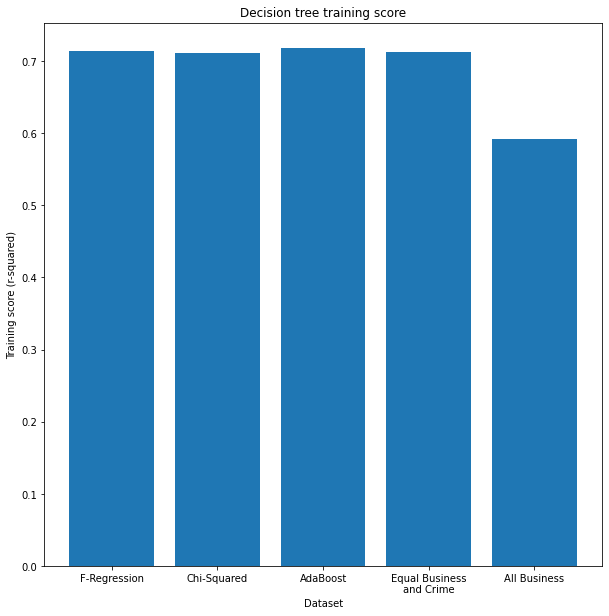

In [71]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.title("Decision tree training score")
plt.xlabel("Dataset")
plt.ylabel("Training score (r-squared)")
plt.bar(y_select, training_scores)

<BarContainer object of 5 artists>

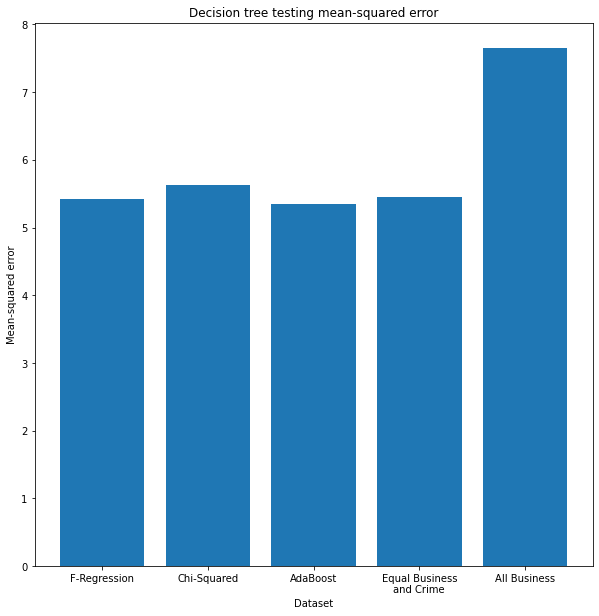

In [72]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.title("Decision tree testing mean-squared error")
plt.xlabel("Dataset")
plt.ylabel("Mean-squared error")
plt.bar(y_select, mse_scores)

<BarContainer object of 5 artists>

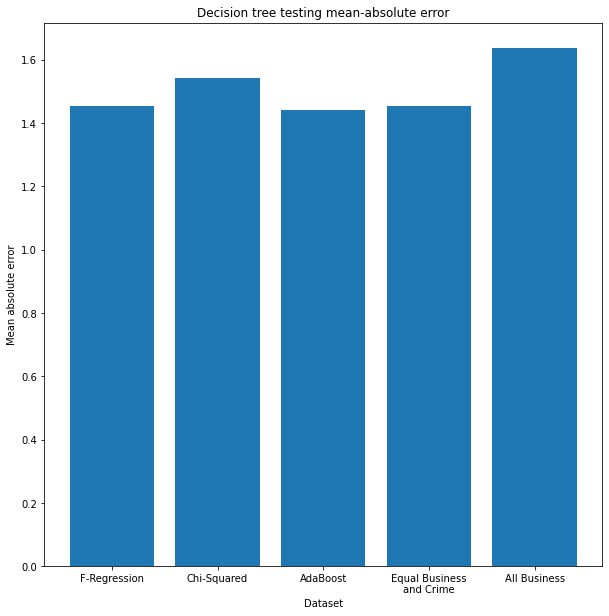

In [73]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.title("Decision tree testing mean-absolute error")
plt.xlabel("Dataset")
plt.ylabel("Mean absolute error")
plt.bar(y_select, mae_scores)

<BarContainer object of 5 artists>

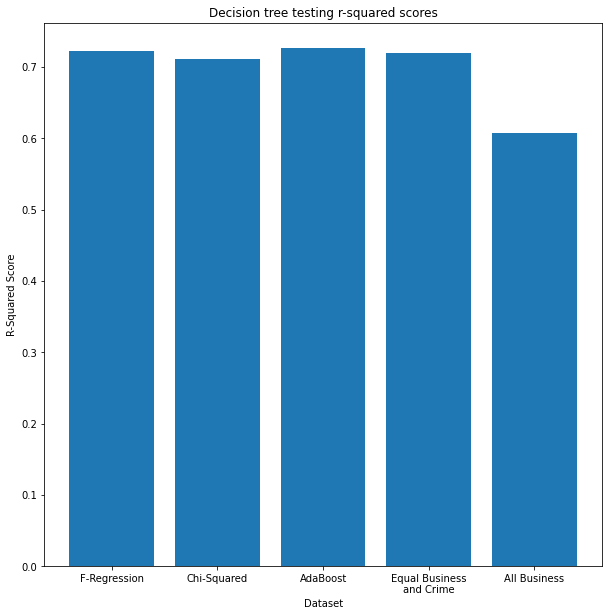

In [74]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.title("Decision tree testing r-squared scores")
plt.xlabel("Dataset")
plt.ylabel("R-Squared Score")
plt.bar(y_select, r2_scores)

In [ ]:
# Adaboost dataset appears to perform best with decision tree, closeley followed by f-regression
# All business dataset does not produce accurate results